### Арцишевский Антон, дз 3

In [17]:
import re
import gensim
import logging
import nltk.data
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from gensim.models import word2vec
from string import punctuation
import warnings
warnings.filterwarnings('ignore')

In [18]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [19]:
from pymystem3 import Mystem
m = Mystem(mystem_bin="C:\mystem.exe")

### Задание 1
Чищу и парсю текст

In [20]:
PUNCT_CHARS = """!"#'$%&\-()*+,./:;<=>?@[\]^_`{|}~«»—"""
PUNCT_CHARS_WITH_SPACES = (' -', '- ', '', '\n', '  ')

In [21]:
from nltk.tokenize import sent_tokenize
TEXT = []
with open('td.txt', encoding='utf-8') as text:
    text = text.read()
text = [word.lower().strip(punctuation) for word in sent_tokenize(text)]
text = [word for word in text if word != '']
for line in text:
    for char in PUNCT_CHARS:
        line = line.replace(char, '')
    for char in PUNCT_CHARS_WITH_SPACES:
        line = line.replace(char, '')
    for char in line:
        char = char.lower()
    TEXT.append(line)
with open('td_lem.txt', 'w', encoding='utf-8') as f:
    for line in TEXT:
        f.write(line)
        f.write('\n')

### Задание 2
Создаю модель по примеру семинара

In [22]:
f ='td_lem.txt'
data = gensim.models.word2vec.LineSentence(f)

Наконец-то многопоточность

In [23]:
%time model_td = gensim.models.Word2Vec(data, size=300, window=5, min_count=5, iter = 50, workers = 8)

2021-07-26 00:58:31,054 : INFO : collecting all words and their counts
2021-07-26 00:58:31,065 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-07-26 00:58:31,128 : INFO : PROGRESS: at sentence #10000, processed 88691 words, keeping 28220 word types
2021-07-26 00:58:31,194 : INFO : collected 47617 word types from a corpus of 183857 raw words and 19496 sentences
2021-07-26 00:58:31,195 : INFO : Loading a fresh vocabulary
2021-07-26 00:58:31,244 : INFO : effective_min_count=5 retains 5156 unique words (10% of original 47617, drops 42461)
2021-07-26 00:58:31,244 : INFO : effective_min_count=5 leaves 123161 word corpus (66% of original 183857, drops 60696)
2021-07-26 00:58:31,262 : INFO : deleting the raw counts dictionary of 47617 items
2021-07-26 00:58:31,266 : INFO : sample=0.001 downsamples 34 most-common words
2021-07-26 00:58:31,266 : INFO : downsampling leaves estimated 99181 word corpus (80.5% of prior 123161)
2021-07-26 00:58:31,280 : INFO : estimate

2021-07-26 00:58:33,873 : INFO : worker thread finished; awaiting finish of 6 more threads
2021-07-26 00:58:33,874 : INFO : worker thread finished; awaiting finish of 5 more threads
2021-07-26 00:58:33,874 : INFO : worker thread finished; awaiting finish of 4 more threads
2021-07-26 00:58:33,875 : INFO : worker thread finished; awaiting finish of 3 more threads
2021-07-26 00:58:33,876 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-26 00:58:33,878 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-26 00:58:33,881 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-26 00:58:33,881 : INFO : EPOCH - 9 : training on 183857 raw words (99258 effective words) took 0.2s, 611832 effective words/s
2021-07-26 00:58:34,028 : INFO : worker thread finished; awaiting finish of 7 more threads
2021-07-26 00:58:34,028 : INFO : worker thread finished; awaiting finish of 6 more threads
2021-07-26 00:58:34,029 : INFO : worker thread 

2021-07-26 00:58:35,340 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-26 00:58:35,344 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-26 00:58:35,344 : INFO : EPOCH - 18 : training on 183857 raw words (99183 effective words) took 0.1s, 690022 effective words/s
2021-07-26 00:58:35,483 : INFO : worker thread finished; awaiting finish of 7 more threads
2021-07-26 00:58:35,484 : INFO : worker thread finished; awaiting finish of 6 more threads
2021-07-26 00:58:35,484 : INFO : worker thread finished; awaiting finish of 5 more threads
2021-07-26 00:58:35,485 : INFO : worker thread finished; awaiting finish of 4 more threads
2021-07-26 00:58:35,485 : INFO : worker thread finished; awaiting finish of 3 more threads
2021-07-26 00:58:35,486 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-26 00:58:35,490 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-26 00:58:35,491 : INFO : worker thread

2021-07-26 00:58:36,836 : INFO : worker thread finished; awaiting finish of 5 more threads
2021-07-26 00:58:36,837 : INFO : worker thread finished; awaiting finish of 4 more threads
2021-07-26 00:58:36,838 : INFO : worker thread finished; awaiting finish of 3 more threads
2021-07-26 00:58:36,838 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-26 00:58:36,840 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-26 00:58:36,843 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-26 00:58:36,843 : INFO : EPOCH - 28 : training on 183857 raw words (99073 effective words) took 0.1s, 700127 effective words/s
2021-07-26 00:58:37,021 : INFO : worker thread finished; awaiting finish of 7 more threads
2021-07-26 00:58:37,022 : INFO : worker thread finished; awaiting finish of 6 more threads
2021-07-26 00:58:37,023 : INFO : worker thread finished; awaiting finish of 5 more threads
2021-07-26 00:58:37,024 : INFO : worker thread

2021-07-26 00:58:38,286 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-26 00:58:38,287 : INFO : EPOCH - 37 : training on 183857 raw words (99236 effective words) took 0.1s, 689514 effective words/s
2021-07-26 00:58:38,461 : INFO : worker thread finished; awaiting finish of 7 more threads
2021-07-26 00:58:38,464 : INFO : worker thread finished; awaiting finish of 6 more threads
2021-07-26 00:58:38,464 : INFO : worker thread finished; awaiting finish of 5 more threads
2021-07-26 00:58:38,465 : INFO : worker thread finished; awaiting finish of 4 more threads
2021-07-26 00:58:38,466 : INFO : worker thread finished; awaiting finish of 3 more threads
2021-07-26 00:58:38,466 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-26 00:58:38,469 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-26 00:58:38,471 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-26 00:58:38,472 : INFO : EPOCH - 38 : 

2021-07-26 00:58:39,941 : INFO : worker thread finished; awaiting finish of 4 more threads
2021-07-26 00:58:39,941 : INFO : worker thread finished; awaiting finish of 3 more threads
2021-07-26 00:58:39,942 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-26 00:58:39,945 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-26 00:58:39,948 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-26 00:58:39,949 : INFO : EPOCH - 47 : training on 183857 raw words (99140 effective words) took 0.1s, 678646 effective words/s
2021-07-26 00:58:40,100 : INFO : worker thread finished; awaiting finish of 7 more threads
2021-07-26 00:58:40,101 : INFO : worker thread finished; awaiting finish of 6 more threads
2021-07-26 00:58:40,102 : INFO : worker thread finished; awaiting finish of 5 more threads
2021-07-26 00:58:40,103 : INFO : worker thread finished; awaiting finish of 4 more threads
2021-07-26 00:58:40,103 : INFO : worker thread

Wall time: 9.4 s


In [24]:
model_td.init_sims(replace=True)
model_path = "td.bin"

print("Saving model...")
model_td.wv.save_word2vec_format(model_path, binary=True)

2021-07-26 00:58:40,442 : INFO : precomputing L2-norms of word weight vectors
2021-07-26 00:58:40,452 : INFO : storing 5156x300 projection weights into td.bin


Saving model...


In [25]:
print('Кол-во слов в модели:',len(model_td.wv.vocab))

Кол-во слов в модели: 5156


### Задание 3
Найду близжайшие 5 слов (для хорошо/плохо сделал дважды, ибо не понятно, что имеется в виду)

In [27]:
model_td.wv.most_similar("гуси", topn=5)

[('коровы', 0.7552879452705383),
 ('шо', 0.736083984375),
 ('яра', 0.7334080934524536),
 ('церковной', 0.6927953958511353),
 ('дети', 0.6803689002990723)]

In [28]:
model_td.wv.most_similar("любовь", topn=5)

[('армия', 0.6798394322395325),
 ('добром', 0.6735732555389404),
 ('большевики', 0.6727602481842041),
 ('родине', 0.6659685969352722),
 ('суровой', 0.6548858880996704)]

In [29]:
model_td.wv.most_similar("прокофий", topn=5)

[('тягуче', 0.6877679228782654),
 ('россыпь', 0.6831684112548828),
 ('оборвав', 0.6669889092445374),
 ('сенцы', 0.6502254605293274),
 ('конюшню', 0.6470028162002563)]

In [30]:
model_td.wv.most_similar("хорошо", topn=5)

[('хорош', 0.7230625152587891),
 ('ага', 0.7208964824676514),
 ('мол', 0.7200640439987183),
 ('спаси', 0.700061559677124),
 ('христос', 0.6958115100860596)]

In [31]:
model_td.wv.most_similar("плохо", topn=5)

[('гутарить', 0.6833817362785339),
 ('говори', 0.6742918491363525),
 ('ль', 0.6636675596237183),
 ('скажи', 0.6518785953521729),
 ('понимаю', 0.6515131592750549)]

Поскольку исходных слов не было, пришлось поменять

In [32]:
model_td.wv.most_similar(["большой", "маленький"], topn=5)

[('рослый', 0.6774926781654358),
 ('погонами', 0.6725444197654724),
 ('плотный', 0.6459163427352905),
 ('подал', 0.6425633430480957),
 ('бородатый', 0.6277729272842407)]

Найду семантическую пропорцию (если это то)

In [33]:
model_td.wv.most_similar(positive=["жизнь", "любовь"], negative=["гуси"], topn=1)

[('дочь', 0.6292859315872192)]

Найду лишнее слово

In [34]:
model_td.wv.doesnt_match("гуси коровы крест улыбка".split())

'крест'

### Задание 4

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

words = ['григорий', 'аксинья', 'степан', 'наталья']
X = model_td[words]

In [37]:
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

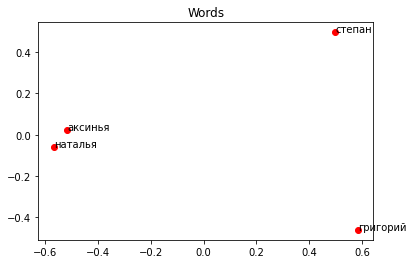

In [38]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

### Задание 5
Тут всё просто. Беру рандомное предложение, спличу по словам. Дальше меняю каждое слово на самое похожее и запихиваю в новый список.

In [39]:
replaced_words = TEXT[25]
replaced_words = replaced_words.split()

In [40]:
result = []
for word in replaced_words:
    if word in model_td:
        group_ersatz = model_td.most_similar(word, topn=1)
        ersatz = group_ersatz[0][0]
        word = word.replace(word, ersatz)
    result.append(word)
print(result)

['местечко', 'терялся', 'ту', 'догадках', 'подыскивая', 'объяснение', 'давайте', 'диковинным', 'поступкам', 'бабам', 'следом', 'разговорами', 'поискаться', 'сказано', 'стало']
